# Time Series data 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
import pandas_datareader as data_reader
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12, 5)

#한글 폰트 사용
import platform
from matplotlib import font_manager
 
if platform.system() == "Darwin":  #Mac
    plt.rc('font', family='AppleGothic')
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf' # For Windows 
    font_name = font_manager.FontProperties(fname=font_path).get_name()  
    plt.rc('font', family=font_name)                           

plt.rcParams['axes.unicode_minus'] = False  #한글사용시 마이너스 사인 깨짐 방지

### 원달러 환율 시각화

- FRED(Federal Reserve Economic Data) 에서 원달러 환율 가져오기

`DEXKOUS` - South Korea Won-Dollar 환율

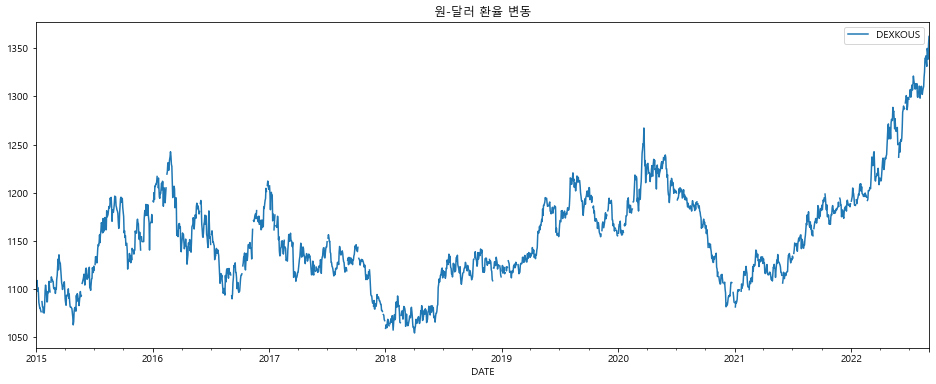

In [2]:
import pandas_datareader as data_reader

fx = data_reader.DataReader('DEXKOUS', 'fred', '2015-01-01')
fx.plot(figsize=(16, 6));
plt.title("원-달러 환율 변동");

# 시각화를 통한 주식 시장의 변동 장기 분석
- 역사적 바닥, 천장 시각화  
- 미국, 한국 시장, 금리 비교  
- 비트코인 추세 시각화

- 1970 년대 이후의 다우 존수 종합 지수 변동 시각화

In [5]:
dji1 = pd.read_csv('DJI_1970.csv', index_col=0, 
                   parse_dates=True)
dji1.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
1970-01-02,800.4,813.6,797.3,809.2,907895
1970-01-05,809.2,819.2,804.8,811.3,1295865


In [6]:
dji1.tail(2)

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-18,35661.76,35661.76,35262.02,35368.47,490284707
2022-01-19,35412.30,35547.83,35015.49,35028.65,443221700


In [7]:
dji2 = data_reader.DataReader("^DJI", data_source="yahoo", 
                              start='20220121')
dji2.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-20,35490.199219,34670.121094,35102.660156,34715.390625,369070000,34715.390625
2022-01-21,34896.671875,34229.550781,34701.691406,34265.371094,523880000,34265.371094


In [8]:
dji = pd.concat([dji1, dji2])
dji.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1970-01-02,800.4,813.6,797.3,809.2,907895,NaN
1970-01-05,809.2,819.2,804.8,811.3,1295865,NaN


In [9]:
dji.tail(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2022-09-06,31343.789062,31463.890625,31048.460938,31145.300781,347320000,31145.300781
2022-09-07,31145.630859,31644.339844,31095.210938,31581.279297,355104980,31581.279297


In [12]:
bond = pd.read_csv('FRED_rate_2Y.csv', names=['date', 'rate'], 
              header=0)
bond['date'] = pd.to_datetime(bond['date'])
bond.set_index('date', inplace=True)
bond.head(2)

,rate
date,
1976-06-01,7.26
1976-06-02,7.23


In [13]:
df = pd.concat([dji, bond], axis=1)

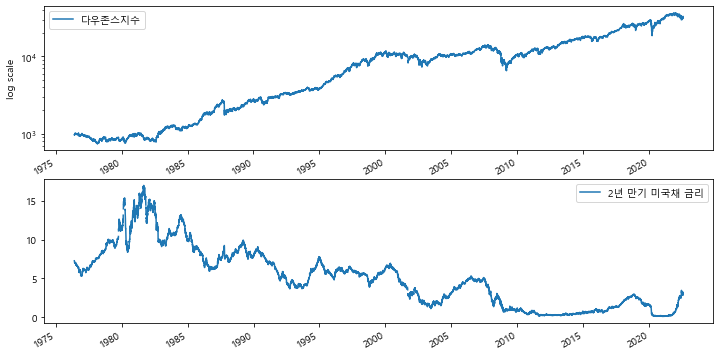

In [14]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(3, 1, 1)
df.loc['1976-06':'2022-07', 'Close'].plot(ax=ax, label="다우존스지수")
ax.set_yscale('log')
ax.legend()
ax.set_ylabel('log scale')
ax = fig.add_subplot(3, 1, 2)
df.loc['1976-06':'2022-07', 'rate'].plot(ax=ax, label="2년 만기 미국채 금리")
ax.legend()

가격의 변화가 큰 경우 y 축을 log scale로 취하면 실제 가격 변동률의 착시 현상을 없앨 수 있다. (같은 등락률이 같은 길이로 표현)

### 1973~74년 1차 오일 쇼크
- 1979년 이란 혁명. 전세계적으로 물가는 상승하면서 실업 등의 문제는 오히려 심각해지는 스태그플레이션이 나타났으며, 미국의 FRB는 급작스럽게 불어난 달러를 미국 은행으로 회수하기 위해 금리를 21%까지 인상

In [15]:
df = bond.loc['1976-06-01':'1985-12-31']
df.head(2)

,rate
date,
1976-06-01,7.26
1976-06-02,7.23


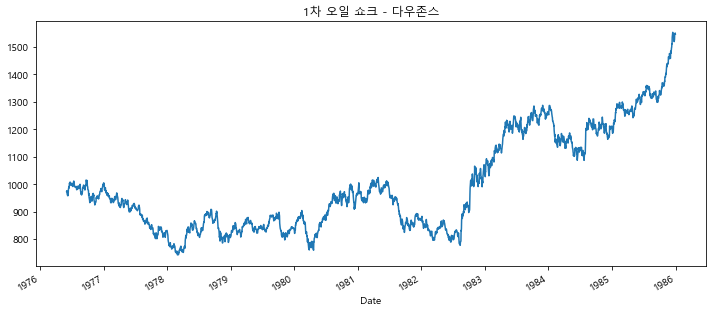

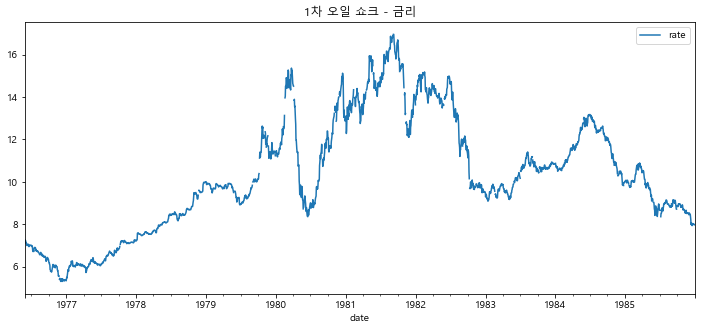

In [16]:
series = dji.loc['1976-06-01':'1985-12-31']['Close']
series.plot(label="다우존스 공업평균 지수")
plt.title("1차 오일 쇼크 - 다우존스")
df.plot(label='10년 만기 US Bond 금리')
plt.title("1차 오일 쇼크 - 금리")
plt.legend();

In [17]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() 
                                 - series.min())/series.max()*100))

최고점 1985-12-16 00:00:00 1553.1
최저점 1978-02-28 00:00:00 742.1
Drawdown 52.2%


### Dow Jones 1974 년 바닥 이후 V자 급등

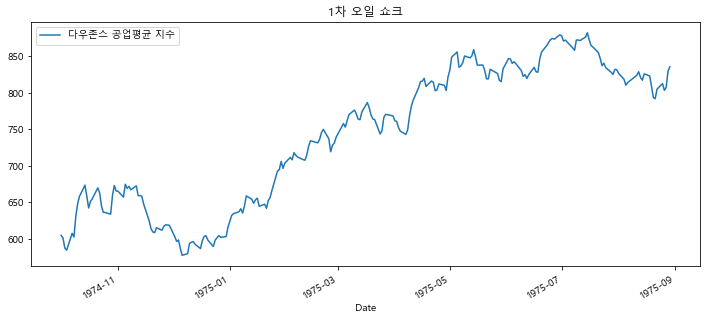

In [18]:
series = dji.loc['1974-10-01':'1975-08-31']['Close']
series.plot(label="다우존스 공업평균 지수")
plt.title("1차 오일 쇼크")
plt.legend();

In [19]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("상승폭 {:.1f}%".format((series.max() 
                            - series.min())/series.min()*100))

최고점 1975-07-15 00:00:00 881.8
최저점 1974-12-06 00:00:00 577.6
상승폭 52.7%


### dot-com bubble (2000 년 3월)
- 인터넷 관련 분야가 성장하면서 산업 국가의 주식 시장이 지분 가격의 급속한 상승을 본 1995년부터 닷컴 버블이 붕괴된 2001년까지 걸친 거품 경제 현상

### 버블 붕괴 시의 다우존스 지수 하락

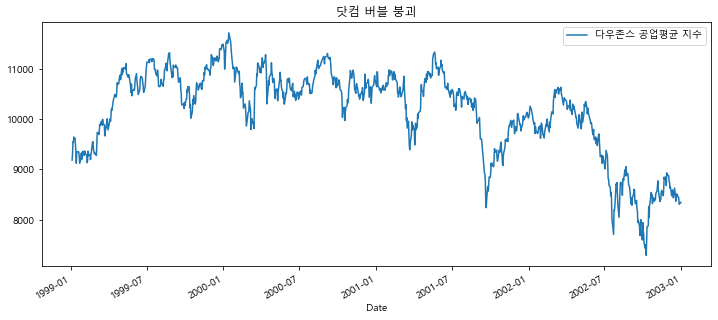

In [20]:
series = dji.loc['1999-01':'2002-12']['Close']
series.plot(label="다우존스 공업평균 지수")
plt.title("닷컴 버블 붕괴");
plt.legend();

In [21]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() 
                                 - series.min())/series.max()*100))

최고점 2000-01-14 00:00:00 11723.0
최저점 2002-10-09 00:00:00 7286.27
Drawdown 37.8%


### 2000 년 3월 dot-com bubble의 Nasdaq 붕괴
1) 3/7 거래량이 크게 증가하며 하락  
2) 3/10 오전장에서만 85 포인트 뛰어 오르며 사상 최고치 경신. 오후에 급락하여 불과 2 포인트 상승으로 마감.  거래량은 평균치 보다 13%나 많음. stall day (기관이 팔고 있다는 표시)  
3) 3/14 대량 거래와 함께 4%나 하락  
4) 3/16~24 까지 상승세. 랠리가 다시 시작되는 것 아닌가 하는 착각을 불러 일으킴.  
5) 4번째 매물 출회되며 상승세에 찬물을 끼얹음.  stall day.  
6) 5번째 매물 출회

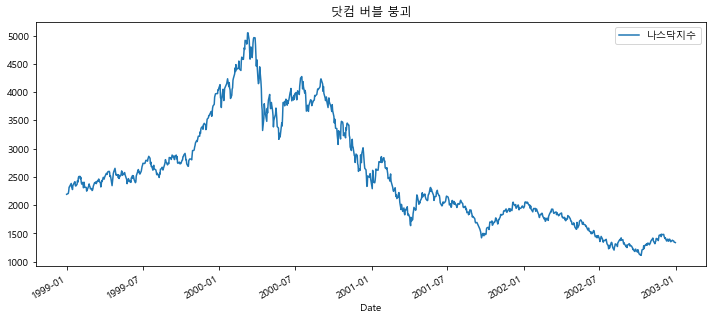

In [22]:
df = yf.download('^IXIC', start='1999-01-01', end='2002-12-31', 
                 progress=False)
series = df['Close']
series.plot(label="나스닥지수")
plt.title("닷컴 버블 붕괴")
plt.legend();

In [23]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() 
                                 - series.min())/series.max()*100))

최고점 2000-03-10 00:00:00 5048.6201171875
최저점 2002-10-09 00:00:00 1114.1099853515625
Drawdown 77.9%


### Nasdaq 지수의 2003 년 바닥 확인 후 V자 상승

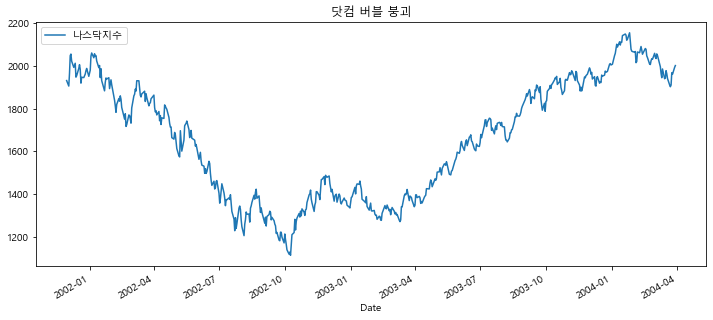

In [24]:
df = yf.download('^IXIC', start='2001-12-01', end='2004-03-31', 
                 progress=False)
series = df['Close']
series.plot(label="나스닥지수")
plt.title("닷컴 버블 붕괴")
plt.legend();

In [25]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("상승폭 {:.1f}%".format((series.max() 
                            - series.min())/series.min()*100))

최고점 2004-01-26 00:00:00 2153.830078125
최저점 2002-10-09 00:00:00 1114.1099853515625
상승폭 93.3%


### 금융위기 (2007 - 2010)
-  2007년 4월(서브프라임 모기지 사태) 또는 2008년 9월부터 미국에서 시작된 세계 규모의 경제 위기

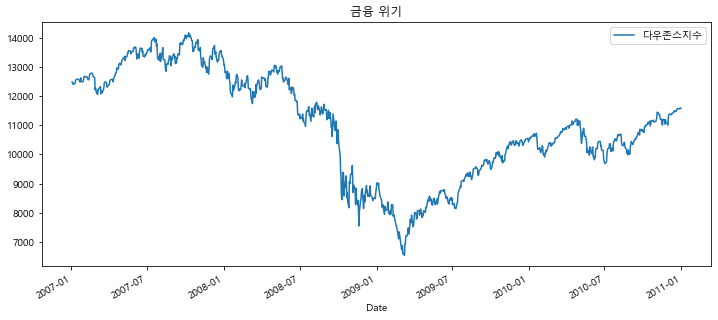

In [26]:
series = dji.loc['2007-01-02':'2010-12-31']['Close']
series.plot(label="다우존스지수")
plt.title("금융 위기");
plt.legend();

In [27]:
print("최고점", series.idxmax(), series.max())
print("최저점", series.idxmin(), series.min())
print("Drawdown {:.1f}%".format((series.max() 
                                 - series.min())/series.max()*100))

최고점 2007-10-09 00:00:00 14164.5
최저점 2009-03-09 00:00:00 6547.05
Drawdown 53.8%


### 2019년 코로나 팬데믹과 2022년의 하락세

- 2019년 12월 중국 우한에서 최초 발생  
- 한국 종합주가 지수와 비교

In [28]:
kospi = data_reader.DataReader("^KS11", data_source="yahoo", 
                               start='2018-12-01', end='2020-04-01')
kospi.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,2136.639893,2113.600098,2127.780029,2131.929932,436600,2131.929932
2018-12-04,2128.939941,2105.449951,2125.669922,2114.350098,507500,2114.350098


In [29]:
nasdaq = data_reader.DataReader("^IXIC", data_source="yahoo", 
                                start='2018-12-01', end='2020-04-01')
nasdaq.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-30,7332.790039,7255.680176,7279.299805,7330.540039,2542820000,7330.540039
2018-12-03,7486.509766,7392.220215,7486.129883,7441.509766,2621020000,7441.509766


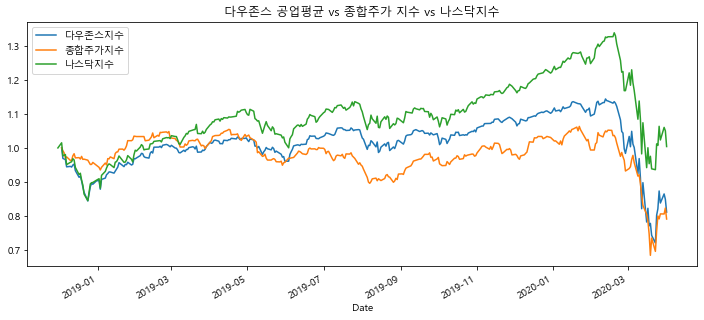

다우존스
최고점 2020-02-12 00:00:00 29551.42
최저점 2020-03-23 00:00:00 18591.93
Drawdown 37.1%

종합주가지수
최고점 2020-01-22 00:00:00 2267.25
최저점 2020-03-19 00:00:00 1457.6400146484375
Drawdown 35.7%

나스닥지수
최고점 2020-02-19 00:00:00 9817.1796875
최저점 2018-12-24 00:00:00 6192.919921875
Drawdown 36.9%


In [30]:
dj_series = dji.loc['2018-12-01':'2020-04-01']['Close']
ko_series = kospi['Close'] 
na_series = nasdaq['Close'] 

series1 = dj_series / dj_series[0]
series2 = ko_series / ko_series[0]
series3 = na_series / na_series[0]
series1.plot(label='다우존스지수')
series2.plot(label='종합주가지수')
series3.plot(label='나스닥지수')

plt.title("다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수")
plt.legend()
plt.show()

print("다우존스")
print("최고점", dj_series.idxmax(), dj_series.max())
print("최저점", dj_series.idxmin(), dj_series.min())
print("Drawdown {:.1f}%".format((dj_series.max() 
                                 - dj_series.min())/dj_series.max()*100))
print()
print("종합주가지수")
print("최고점", ko_series.idxmax(), ko_series.max())
print("최저점", ko_series.idxmin(), ko_series.min())
print("Drawdown {:.1f}%".format((ko_series.max() 
                                 - ko_series.min())/ko_series.max()*100))
print()
print("나스닥지수")
print("최고점", na_series.idxmax(), na_series.max())
print("최저점", na_series.idxmin(), na_series.min())
print("Drawdown {:.1f}%".format((na_series.max() 
                                 - na_series.min())/na_series.max()*100))

### 2020년 양적 완화 이후의 주가 회복 

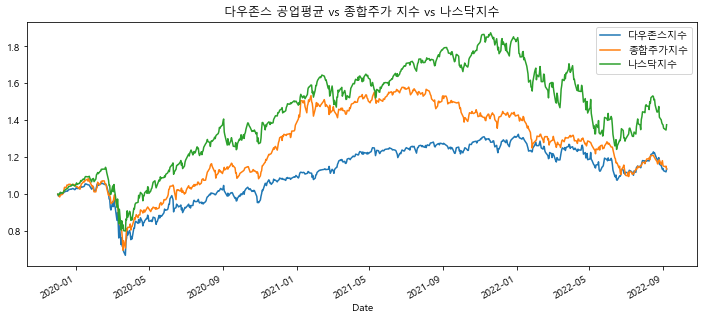

다우존스
최고점 2022-01-04 00:00:00 36799.6484375
최저점 2020-03-23 00:00:00 18591.9296875
상승폭 97.9%

종합주가지수
최고점 2021-07-06 00:00:00 3305.2099609375
최저점 2020-03-19 00:00:00 1457.6400146484375
상승폭 126.8%

나스닥지수
최고점 2021-11-19 00:00:00 16057.4404296875
최저점 2020-03-23 00:00:00 6860.669921875
상승폭 134.1%


In [31]:
df1 = data_reader.DataReader('^DJI',  
                             data_source="yahoo", start='2019-12-01')
df2 = data_reader.DataReader('^KS11', 
                             data_source="yahoo", start='2019-12-01')
df3 = data_reader.DataReader('^IXIC',  
                             data_source="yahoo", start='2019-12-01')

dj_series = df1['Close']
ko_series = df2['Close']
na_series = df3['Close']

series1 = dj_series / dj_series[0]
series2 = ko_series / ko_series[0]
series3 = na_series / na_series[0]
series1.plot(label='다우존스지수')
series2.plot(label='종합주가지수')
series3.plot(label='나스닥지수')

plt.title("다우존스 공업평균 vs 종합주가 지수 vs 나스닥지수")
plt.legend()
plt.show()

print("다우존스")
print("최고점", dj_series.idxmax(), dj_series.max())
print("최저점", dj_series.idxmin(), dj_series.min())
print("상승폭 {:.1f}%".format((dj_series.max() 
                            - dj_series.min())/dj_series.min()*100))
print()
print("종합주가지수")
print("최고점", ko_series.idxmax(), ko_series.max())
print("최저점", ko_series.idxmin(), ko_series.min())
print("상승폭 {:.1f}%".format((ko_series.max() 
                            - ko_series.min())/ko_series.min()*100))
print()
print("나스닥지수")
print("최고점", na_series.idxmax(), na_series.max())
print("최저점", na_series.idxmin(), na_series.min())
print("상승폭 {:.1f}%".format((na_series.max() 
                            - na_series.min())/na_series.min()*100))

## 비트코인 가격 추세

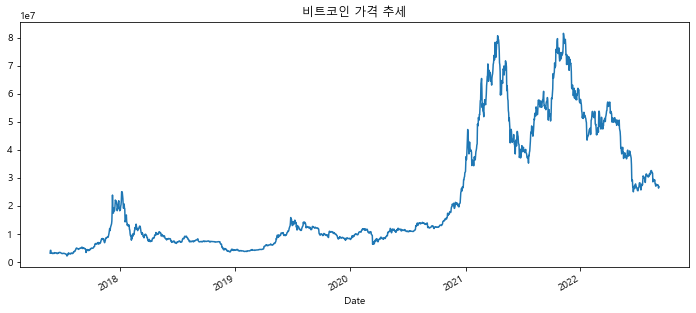

In [32]:
#비트코인 원화 가격 (빗썸), 2016~현재
df = fdr.DataReader('BTC/KRW', '2016')
df['Close'].plot()
plt.title("비트코인 가격 추세");